# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations:
1. Latitude does not seem to have an affect on the humidity, this suggests that other environmental factors attribute to humidity.
2. Unlike humidity, temperature is affected by latitude. Cities closer to the equator tend to have a higher temperature.
3. In both hemispheres, wind speed tends to increase the farther away the city is from the  equator.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['yellowknife', 'vaini', 'hasaki', 'ilulissat', 'nizhneyansk', 'albany', 'tuy hoa', 'mataura', 'new norfolk', 'pochutla', 'avarua', 'kavieng', 'tsihombe', 'balad', 'bambous virieux', 'jamestown', 'geraldton', 'saint-philippe', 'rikitea', 'okoneshnikovo', 'fukue', 'cape town', 'beatrice', 'castro', 'torbay', 'provost', 'bluff', 'zigong', 'independence', 'barentsburg', 'mackenzie', 'busselton', 'nouakchott', 'boras', 'sentyabrskiy', 'tiksi', 'port elizabeth', 'naryan-mar', 'lompoc', 'lebu', 'sibolga', 'punta arenas', 'novo aripuana', 'khani', 'port hedland', 'tsabong', 'kholm-zhirkovskiy', 'tabas', 'illoqqortoormiut', 'hermanus', 'bilma', 'kaitangata', 'fazilka', 'asau', 'atuona', 'srivardhan', 'east london', 'victoria', 'puerto leguizamo', 'hikone', 'maseru', 'hobart', 'yulara', 'fernley', 'arraial do cabo', 'barrow', 'hambantota', 'vigodarzere', 'kapaa', 'biu', 'chimoio', 'hithadhoo', 'rocha', 'saskylakh', 'belaya gora', 'katsuura', 'meyungs', 'beira', 'carauari', 'bathsheba', 'ushuaia

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Set up URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#Create empty lists to store results
lat = []
lng = []
kept_cities = []
wind = []
max_temp = []
humidity = []
country = []
date = []
cloudiness = []
count = 1

#Loop through cities, put data into lists. Use try/except if no data for city is retrieved. 
for city in cities:
    count += 1
    try:
        print(f"Processing Record {count} | {city}")
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        kept_cities.append(response['name'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
    except:
        print("City not found. Skipping...")

Processing Record 2 | yellowknife
Processing Record 3 | vaini
Processing Record 4 | hasaki
Processing Record 5 | ilulissat
Processing Record 6 | nizhneyansk
City not found. Skipping...
Processing Record 7 | albany
Processing Record 8 | tuy hoa
Processing Record 9 | mataura
Processing Record 10 | new norfolk
Processing Record 11 | pochutla
Processing Record 12 | avarua
Processing Record 13 | kavieng
Processing Record 14 | tsihombe
City not found. Skipping...
Processing Record 15 | balad
Processing Record 16 | bambous virieux
Processing Record 17 | jamestown
Processing Record 18 | geraldton
Processing Record 19 | saint-philippe
Processing Record 20 | rikitea
Processing Record 21 | okoneshnikovo
Processing Record 22 | fukue
Processing Record 23 | cape town
Processing Record 24 | beatrice
Processing Record 25 | castro
Processing Record 26 | torbay
Processing Record 27 | provost
Processing Record 28 | bluff
Processing Record 29 | zigong
Processing Record 30 | independence
Processing Record 

Processing Record 235 | homagama
Processing Record 236 | kuche
City not found. Skipping...
Processing Record 237 | kismayo
Processing Record 238 | pisco
Processing Record 239 | srednekolymsk
Processing Record 240 | maine-soroa
Processing Record 241 | yangambi
Processing Record 242 | coahuayana
Processing Record 243 | port hardy
Processing Record 244 | la vergne
Processing Record 245 | mingaora
Processing Record 246 | malwan
City not found. Skipping...
Processing Record 247 | esik
Processing Record 248 | touros
Processing Record 249 | itarema
Processing Record 250 | kandrian
Processing Record 251 | alofi
Processing Record 252 | haibowan
City not found. Skipping...
Processing Record 253 | narsaq
Processing Record 254 | mendi
Processing Record 255 | jacqueville
Processing Record 256 | shelburne
Processing Record 257 | saint-joseph
Processing Record 258 | montemor-o-novo
Processing Record 259 | dikson
Processing Record 260 | anori
Processing Record 261 | karkaralinsk
City not found. Skippi

Processing Record 459 | nishihara
Processing Record 460 | upata
Processing Record 461 | caravelas
Processing Record 462 | hvolsvollur
Processing Record 463 | saldanha
Processing Record 464 | armacao dos buzios
City not found. Skipping...
Processing Record 465 | ust-omchug
Processing Record 466 | mahajanga
Processing Record 467 | azimur
City not found. Skipping...
Processing Record 468 | beringovskiy
Processing Record 469 | saint-georges
Processing Record 470 | margherita
Processing Record 471 | manavgat
Processing Record 472 | daitari
Processing Record 473 | middelburg
Processing Record 474 | konstantinovka
Processing Record 475 | chapais
Processing Record 476 | bukavu
Processing Record 477 | pemba
Processing Record 478 | taltal
Processing Record 479 | chino valley
Processing Record 480 | erenhot
Processing Record 481 | severo-kurilsk
Processing Record 482 | ocampo
Processing Record 483 | biak
Processing Record 484 | qingdao
Processing Record 485 | inhambane
Processing Record 486 | kir

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data = pd.DataFrame({'City': kept_cities,
                             'Latitude': lat,
                             'Longitude': lng,
                             'Max Temp': max_temp,
                             'Humidity': humidity,
                             'Cloudiness': cloudiness,
                             'Wind Speed': wind,
                             'Country': country,
                             'Date': date})

weather_data.to_csv('weather_data.csv')
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,46.92,87,75,4.61,CA,1632178653
1,Vaini,-21.2000,-175.2000,73.56,88,75,13.80,TO,1632178654
2,Hasaki,35.7333,140.8333,68.40,63,56,7.54,JP,1632178654
3,Ilulissat,69.2167,-51.1000,22.03,75,100,5.06,GL,1632178572
4,Albany,42.6001,-73.9662,73.98,78,34,4.41,US,1632178426


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

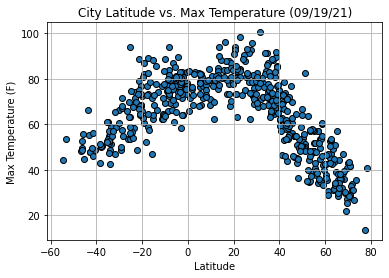

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(weather_data['Latitude'], weather_data['Max Temp'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs. Temperature Plot.png")

## Latitude vs. Humidity Plot

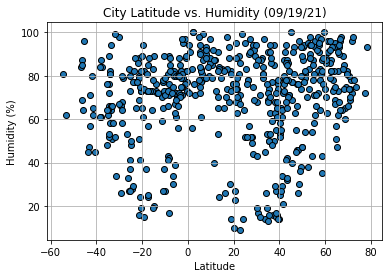

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs. Humidity Plot.png")

Latitude vs. Cloudiness Plot

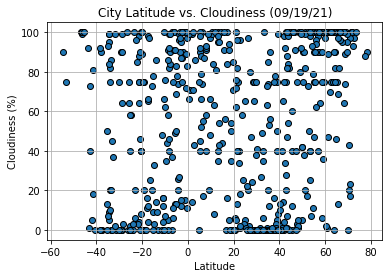

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'], edgecolors='black')
plt.title('City Latitude vs. Cloudiness (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs. Cloudiness Plot.png")

## Latitude vs. Wind Speed Plot

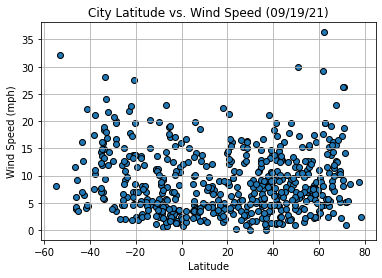

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'], edgecolors='black')
plt.title('City Latitude vs. Wind Speed (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs. Wind Speed Plot.png")

## Linear Regression

In [13]:
northern = weather_data[weather_data['Latitude'] >= 0]
southern = weather_data[weather_data['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

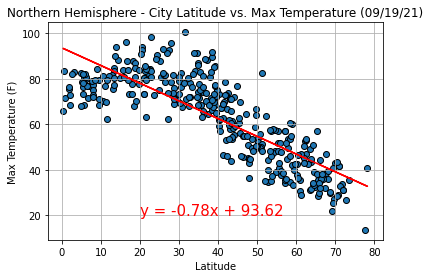

The r-squared is: 0.6775713334931704


<Figure size 432x288 with 0 Axes>

In [14]:
northern_lat = northern['Latitude']
northern_temp = northern['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat, northern_temp)
regress_value = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat, northern_temp, edgecolors='black')
plt.plot(northern_lat, regress_value, "r-")
plt.annotate(line_eq, (20,20), fontsize=15, color="red")
plt.title('Northern Hemisphere - City Latitude vs. Max Temperature (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Latitude vs. Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

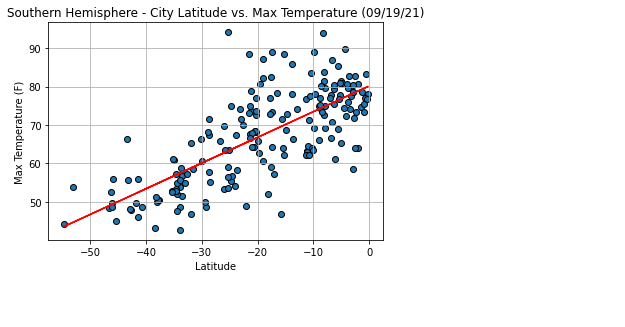

The r-squared is: 0.5412333721591975
Line equeation: y = 0.67x + 80.14


<Figure size 432x288 with 0 Axes>

In [15]:
southern_lat = southern['Latitude']
southern_temp = southern['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat, southern_temp)
regress_value = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat, southern_temp, edgecolors='black')
plt.plot(southern_lat, regress_value, "r-")
plt.annotate(line_eq, (20,20), fontsize=15, color="red")
plt.title('Southern Hemisphere - City Latitude vs. Max Temperature (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"Line equeation: {line_eq}")
plt.savefig("Images/Latitude vs. Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The 2 graphs above show that the closer you get to the equator, temperature will rise. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

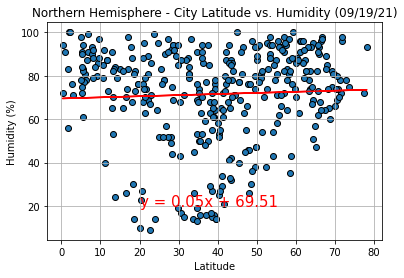

The r-squared is: 0.0021365432598969085
Line equeation: y = 0.05x + 69.51


<Figure size 432x288 with 0 Axes>

In [16]:
northern_humidity = northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat, northern_humidity)
regress_value = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat, northern_humidity, edgecolors='black')
plt.plot(northern_lat, regress_value, "r-")
plt.annotate(line_eq, (20,20), fontsize=15, color="red")
plt.title('Northern Hemisphere - City Latitude vs. Humidity (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"Line equeation: {line_eq}")
plt.savefig("Images/Latitude vs. Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

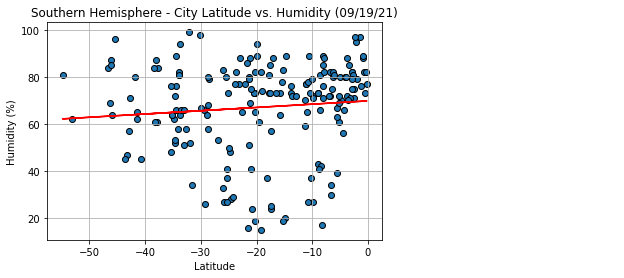

The r-squared is: 0.008944965931342098
Line equeation: y = 0.14x + 69.83


<Figure size 432x288 with 0 Axes>

In [17]:
southern_humidity = southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat, southern_humidity)
regress_value = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat, southern_humidity, edgecolors='black')
plt.plot(southern_lat, regress_value, "r-")
plt.annotate(line_eq, (20,20), fontsize=15, color="red")
plt.title('Southern Hemisphere - City Latitude vs. Humidity (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"Line equeation: {line_eq}")
plt.savefig("Images/Latitude vs. Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The 2 graphs above show that latitude doesn't have a big effect on humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

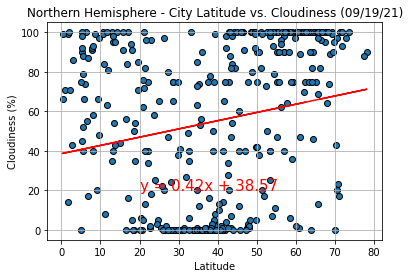

The r-squared is: 0.042166398396467186
Line equeation: y = 0.42x + 38.57


<Figure size 432x288 with 0 Axes>

In [18]:
northern_cloudiness = northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat, northern_cloudiness)
regress_value = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat, northern_cloudiness, edgecolors='black')
plt.plot(northern_lat, regress_value, "r-")
plt.annotate(line_eq, (20,20), fontsize=15, color="red")
plt.title('Northern Hemisphere - City Latitude vs. Cloudiness (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"Line equeation: {line_eq}")
plt.savefig("Images/Latitude vs. Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

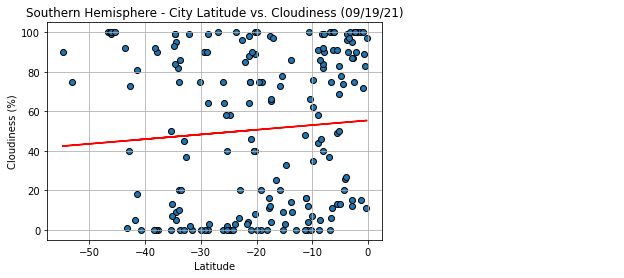

The r-squared is: 0.006467416972910842
Line equeation: y = 0.24x + 55.41


<Figure size 432x288 with 0 Axes>

In [19]:
southern_cloudiness = southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat, southern_cloudiness)
regress_value = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat, southern_cloudiness, edgecolors='black')
plt.plot(southern_lat, regress_value, "r-")
plt.annotate(line_eq, (20,20), fontsize=15, color="red")
plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"Line equeation: {line_eq}")
plt.savefig("Images/Latitude vs. Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The 2 graphs above show that in the Northern Hemisphere, clouds increase as you head away from the equator. Slope of the line for the Southern Hemisphere suggests the opposite.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

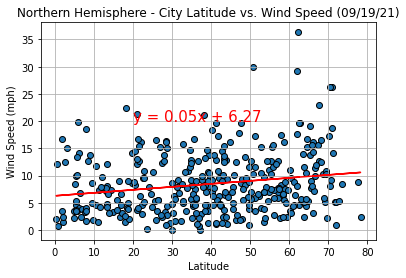

The r-squared is: 0.037689698991196056
Line equeation: y = 0.05x + 6.27


<Figure size 432x288 with 0 Axes>

In [20]:
northern_wind = northern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat, northern_wind)
regress_value = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat, northern_wind, edgecolors='black')
plt.plot(northern_lat, regress_value, "r-")
plt.annotate(line_eq, (20,20), fontsize=15, color="red")
plt.title('Northern Hemisphere - City Latitude vs. Wind Speed (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"Line equeation: {line_eq}")
plt.savefig("Images/Latitude vs. Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

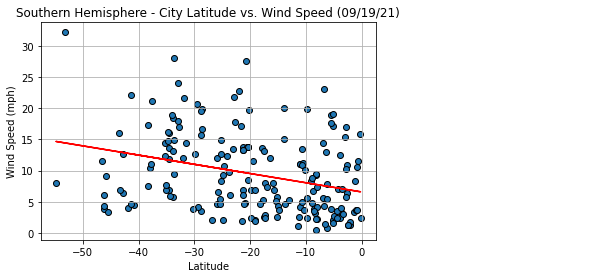

The r-squared is: 0.09433730788595011
Line equeation: y = -0.15x + 6.56


<Figure size 432x288 with 0 Axes>

In [21]:
southern_wind = southern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat, southern_wind)
regress_value = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat, southern_wind, edgecolors='black')
plt.plot(southern_lat, regress_value, "r-")
plt.annotate(line_eq, (20,20), fontsize=15, color="red")
plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (09/19/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"Line equeation: {line_eq}")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

The 2 graphs above show that in both hemisphere's, wind will increase as you head away from the equator.